# Practical 1: Dimensionality Reduction

**Course:** WBCS032-05 Introduction to Machine Learning  
**Student Names:**  Winand Metz, Matthias Nijman  
**Student Numbers:**  S6417221, S4667999

---

## Assignment Overview

In this assignment, you will implement Principal Component Analysis (PCA) to reduce the dimensionality of the data, as discussed in the lecture.

You will work with the `COIL20.mat` dataset on Themis. The dataset consists of 1440 images, where each image has a size of $32 \times 32$ pixels and is flattened into a vector of length 1024. All images are stored in one matrix of size $1440 \times 1024$, where each row represents one image and each column corresponds to a pixel. The images come from 20 different objects, and each object is recorded at 72 different rotation angles, with a rotation step of 5 degrees.

## 1. Introduction (1 point)

Describe the goal of this assignment and briefly explain why dimensionality reduction and PCA are useful in data analysis.

**Your answer here:**

The goal of this assignment is to apply and experiment with PCA to develop an understanding of dimensionality reduction through basic feature extraction. A secondary goal of the assignment is that it serves as a first introduction to foundational mathematical concepts widely used in machine learning. PCA itself is a preprocessing technique that compresses the data by reducing the dimensionality through encoding information in variance in lower dimensions, which decreases storage and computation needs during analysis.

## 2. Methods (3 points)

### 2.1 Explain the PCA Algorithm (0.5 points)
Explain the PCA algorithm in a general manner.

**Your answer here:**  
PCA (Principal Component Analysis) is a linear method of feature extraction for unsupervised machine learning.
The goal is to find a new set of dimensions that are the combinations of the original dimensions.
This is done by mapping data points from a high-dimensional space to a low-dimensional space while minimizing information loss.
The steps of PCA are:
1. Standardize the data set.
2. Compute the principal components:
    - Compute the co-variance matrix.
    - Compute eigenvalues and eigenvectors.
3. Choose reduced dimensionality *d*.
4. Only pick the first *d* eigenvectors, where the eigenvectors are the principal components.  
In general, the i-th eigenvector of the covariance matrix is associated to the i-th eigenvalue.


### 2.2 Implementation (2.5 points)

You need to implement the PCA algorithm **yourself**. Both the code quality and correctness will be graded.

*__Note:__* **Do not change the cell labels! Themis will use them to automatically grade your submission.**

In [585]:
# Load required libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.manifold import TSNE

# Data configuration
data_file_path = 'COIL20.mat'
image_shape = (32, 32)

# PCA parameters
d = 40  # Target dimensionality

# t-SNE parameters
tsne_perplexity = 4

#### PCA Algorithm Steps

Implement the following steps:

1. **Normalize the data:**
   $$Z = \frac{X - \mu}{\sigma}$$
   where $\mu$ is the mean of all samples and $\sigma$ is the standard deviation.

2. **Compute the covariance matrix of the normalized data** and obtain its eigenvalues $D$ and eigenvectors $U$.  
   You may use `np.linalg.eig` in Python.

3. **Sort the eigenvectors in descending order of their eigenvalues** and select the first $d$ principal components to form $U_d$.

4. **Reduce the dimensionality of the data** by projecting the normalized data onto the selected principal components.

In [586]:
# Implement PCA here
def normalize_data(x):
    """
    Normalize data for PCA, using Z = (X - mean) / standard deviation.

    Args:
        x (np.ndarray): Dataset matrix (each column represents a variable)

    Returns:
        z (np.ndarray): Normalized dataset matrix with the same shape as x
    """
    z = (x - x.mean(axis = 0)) / x.std(axis = 0)

    return z


def compute_covariance_matrix(z):
    """
    Computes the covariance matrix of the normalized data by taking the cross product 
    of the matrix and its transposed counterpart multiplied by a scalar.

    Args:
        z (np.ndarray): Normalized dataset matrix (each column represents a variable)

    Returns:
        c (np.ndarray): Covariance matrix with new shape (z.y, zT.x)
    """
    c = np.cov(z, rowvar = False)

    return c


def compute_sorted_eigenvectors(c):
    """
    Computes the eigenvectors and eigenvalues of the covariance matrix and sorts them by eigenvalue.

    Args: 
        c (np.ndarray): Covariance matrix

    Returns:
        tuple: (sorted_eigenvalues, sorted_eigenvectors)
            - sorted_eigenvalues (np.ndarray): Eigenvalues, sorted descending
            - sorted_eigenvectors (np.ndarray): Eigenvectors, sorted by eigenvalues descending
    """
    eigenvalues, eigenvectors = np.linalg.eig(c)

    sorted_eigenvalues_idx = np.argsort(eigenvalues)[::-1]

    sorted_eigenvalues = eigenvalues[sorted_eigenvalues_idx]
    sorted_eigenvectors = eigenvectors[:,sorted_eigenvalues_idx]

    return sorted_eigenvalues, sorted_eigenvectors


def select_principal_components(eigenvectors, d):
    """
    Select the first d principal components.

    Args:
        sorted_eigenvectors (np.ndarray): Eigenvectors, sorted by eigenvalues descending
        d (int): Dimensionality of the projection

    Returns:
        U_d (np.ndarray): Matrix of principal components, sorted descending
    """
    U_d = eigenvectors[:,:d]

    return U_d


def reduce_dimensionality(U_d, z):
    """
    Reduces the dimensionality of the data.

    Args:
        U_d (np.ndarray): Matrix of principal components, sorted descending
        x (np.ndarray): Original dataset matrix (each column represents a variable)

    Returns:
        Z_d (np.ndarray): Reduced version of the dataset
    """
    Z_d = z @ U_d

    return Z_d


def PCA(x, d):
    """
    Apply Principal Component Analysis.

    Args:
        x (np.ndarray): Dataset matrix (each column represents a variable)
        d (int): Dimensionality of the projection

    Returns:
        tuple: (U_d, eigen_values, Z_d)
            - U_d (np.ndarray): Matrix of principal components, sorted descending
            - eigen_values (np.ndarray): Eigenvalues, sorted descending
            - Z_d (np.ndarray): Reduced version of the dataset
    """
    z = normalize_data(x)
    c = compute_covariance_matrix(z)

    eigen_values, eigen_vectors = compute_sorted_eigenvectors(c)

    U_d = select_principal_components(eigen_vectors, d)
    Z_d = reduce_dimensionality(U_d, z)

    return U_d, eigen_values, Z_d

In [587]:
# Extract dataset 
data_dict = scipy.io.loadmat(data_file_path)
x = data_dict['X']

In [588]:
# Apply PCA to the dataset
U_d, eigen_values, Z_d = PCA(x,d)

## 3. Experimental Results (4 points)

*__Note:__* This section is not graded by Themis.

### 3.1 Eigenvalue Profile

Write code in the cell below to plot the eigenvalue profile of the data. This plot helps determine how many principal components to retain for dimensionality reduction. Make sure that all plots are clearly labeled. Each figure must include labeled axes, an appropriate title, and a legend where applicable.

- **X-axis:** Eigenvalue indices $(1, 2, \ldots, 1024)$
- **Y-axis:** Eigenvalue magnitude


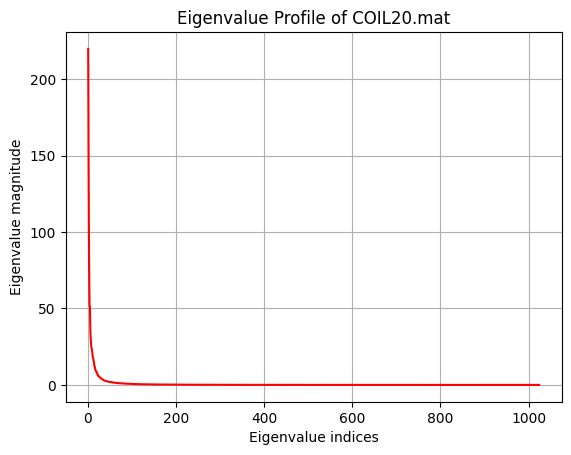

In [589]:
plt.plot(range(1, len(eigen_values)+1), eigen_values, c = "r")
plt.title("Eigenvalue Profile of COIL20.mat")
plt.xlabel("Eigenvalue indices")
plt.ylabel("Eigenvalue magnitude")
plt.grid()

### 3.2 Dimensionality Table

Create a table reporting the dimensionality $d$ required to keep 0.9, 0.95, and 0.98 fraction of the total variance. Write code in the cell below to compute these values, then fill in the table.

Use the formula:
$$p_d = \frac{\sum_{i=1}^{d}\lambda_i}{\sum_{i=1}^{n}\lambda_i}$$

In [590]:
def compute_d(eigen_values, pd):
    """
    Compute the dimensionality required to keep `pd` fraction of the total variance.

    Args:
        eigen_values (np.ndarray): Eigenvalues, sorted descending
        pd (float): Fraction of total variance
        
    Returns:
        d (int): Dimensionality of the projection
    """
    d = 0
    current_pd = 0

    while current_pd < pd:
        d += 1
        current_pd = sum(eigen_values[:d]) / sum(eigen_values)

    return d

compute_d(eigen_values, 0.9), compute_d(eigen_values, 0.95), compute_d(eigen_values, 0.98)

(55, 107, 206)

| Variance Fraction | Dimensionality (d) |
|-------------------|-------------------|
| 0.90              | 55                |
| 0.95              | 107               |
| 0.98              | 206               |

### 3.3 t-SNE Visualization

Visualize the reduced data using t-SNE in a 2-dimensional feature space.

- Use different colors for data points from different objects
- Every 72 data examples correspond to one object
- You can use `sklearn.manifold.TSNE` in Python with the configured perplexity parameter

In [591]:
def generate_objects(n):
    labels = list(range(0, n))
    objects = []
    for label in labels:
        objects += [label for i in range(72)]
    return objects

labels = generate_objects(20)

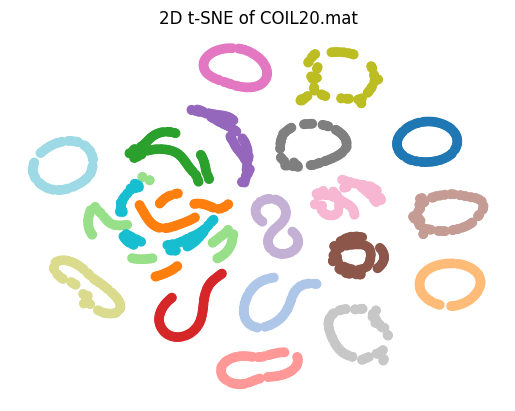

In [592]:
tsne_model = TSNE(perplexity=tsne_perplexity, random_state=123).fit_transform(x)

plt.scatter(tsne_model[:, 0], tsne_model[:, 1], c = labels, cmap = "tab20")
plt.title("2D t-SNE of COIL20.mat")
plt.axis('off')
plt.show()

## 4. Discussion (2 points)

Discuss your observations on the obtained results:
- What does the eigenvalue profile tell you about the data?
- How well does PCA reduce the dimensionality while preserving variance?
- What do you observe in the t-SNE visualization? Are the objects well-separated?

**Your answer here:**

**What does the eigenvalue profile tell you about the data?**

The profile weights heavily on the first few features. This is expressed by the sharp fall-off at the start of the plot, where, from approximately the 100th eigenvalue, the significance is nearly zero.

**How well does PCA reduce the dimensionality while preserving variance?**

Quite well. For 98% total variance preservation, we already reduce to keeping only $\frac{206}{1440}\times 100\%\approx14\%$ of the data. For 95%, we keep $\frac{107}{1440}\times 100\%\approx7\%$ of the data, and for 90% we keep $\frac{55}{1440}\times 100\%\approx4\%$ of the data.

**What do you observe in the t-SNE visualization? Are the objects well-separated?**

They are mostly well separated, except for the mixed clusters on the left side of the plot. Three object clusters (pastel green, cyan, and orange) flurry together quite closely, almost overlapping, while the rest of the object clusters are widely separated in distinct shapes.

### A note on Themis
Themis will only grade your implementation of the PCA algorithm, thus giving a maximum of `2.5` points. It does so by executing every cell up to and including the PCA call. Make sure your code runs without errors and produces the expected outputs before submitting.

## Contribution

State your individual contribution.

**Your answer here:**  
We work with pair-programming, thus we have contributed equally to the assignment.